# OLD CAR PRICE PREDICTION

Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase                                                                     
• Data Collection Phase                                                         
• Model Building Phase

here we show only Model Building Phase

In [128]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\For Internship\OLd Car Price Webscraping Data.csv")

In [129]:
df.head(20)

,Unnamed: 0,Unnamed: 1,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,1,NaN,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,2,NaN,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,3,NaN,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,4,NaN,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,5,NaN,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
5,6,NaN,Honda City V CVT,2019,28707,Petrol,Automatic,1,18.40,1498,1050000,Ahmedabad
6,7,NaN,Kia Seltos HTX Plus AT D,2019,34000,Diesel,Automatic,1,17.80,1493,1350000,Ahmedabad
7,8,NaN,Honda City i-VTEC CVT V,2019,13300,Petrol,Automatic,1,18.00,1497,1200000,Ahmedabad
8,9,NaN,Kia Seltos HTX Plus AT D,2019,35000,Diesel,Automatic,1,17.80,1493,1575000,Ahmedabad
9,10,NaN,Audi Q TDI Quattro Premium,2014,71003,Diesel,Automatic,1,15.73,1968,1650000,Ahmedabad


In [130]:
#showin all the columns of the DataFrame
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Model', 'Make_Year', 'Driven_Kilometers',
       'Fuel', 'Transmission', 'Owner(s)', 'Mileage', 'Engine', 'Price',
       'Location'],
      dtype='object')

# Exploretory Data Analysis(EDA)

In [131]:
#import visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [132]:
#checkig shape of the Dataframe
df.shape

(6224, 12)

our dataframe has 1168 rows and 81 columns.It means we have 1168 house's 81 type of data.

In [133]:
#Checking null values
df.isnull().sum()

Unnamed: 0              0
Unnamed: 1           6224
Model                   0
Make_Year               0
Driven_Kilometers       0
Fuel                    0
Transmission            0
Owner(s)                0
Mileage                 0
Engine                  0
Price                   0
Location                0
dtype: int64

I can see unnamed column has no value.so we drop this column.                     
we don't need Unnamed: 0.so we drop it

In [134]:
df=df.drop(["Unnamed: 1",'Unnamed: 0'],axis=1)

In [135]:
df

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [136]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              6224 non-null   object 
 1   Make_Year          6224 non-null   int64  
 2   Driven_Kilometers  6224 non-null   int64  
 3   Fuel               6224 non-null   object 
 4   Transmission       6224 non-null   object 
 5   Owner(s)           6224 non-null   int64  
 6   Mileage            6224 non-null   float64
 7   Engine             6224 non-null   int64  
 8   Price              6224 non-null   int64  
 9   Location           6224 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 486.4+ KB


<AxesSubplot:>

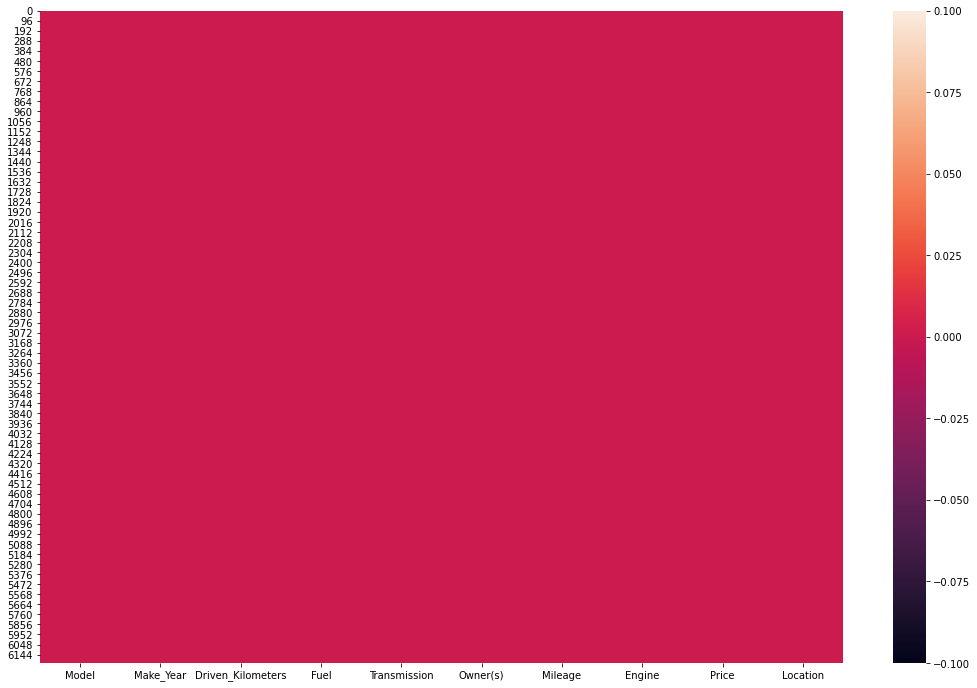

In [137]:
#Checking missing value using heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

there is lot of missing value are in the dataset.we have to handle it.

In [138]:
#percentage of missing values
(df.isnull().sum()/1168*100).sort_values(ascending=False)

Model                0.0
Make_Year            0.0
Driven_Kilometers    0.0
Fuel                 0.0
Transmission         0.0
Owner(s)             0.0
Mileage              0.0
Engine               0.0
Price                0.0
Location             0.0
dtype: float64

we see there is no missing value.

In [139]:
#Describing the Dataset
df.describe()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
count,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6.224000e+03
mean,2014.862789,58242.295148,1.214653,19.957942,1405.529724,7.030040e+05
std,3.056772,37702.893801,0.467354,3.872215,467.313843,7.639553e+05
min,2000.000000,500.000000,1.000000,7.500000,624.000000,4.500000e+04
25%,2013.000000,32119.250000,1.000000,17.400000,1197.000000,3.550000e+05
50%,2015.000000,55000.000000,1.000000,20.140000,1248.000000,5.000000e+05
75%,2017.000000,77072.250000,1.000000,22.540000,1498.000000,7.000000e+05
max,2021.000000,886253.000000,4.000000,36.000000,5000.000000,9.100000e+06


Now we divide all the columns into categorical and numerical types

In [140]:
df.dtypes.index

Index(['Model', 'Make_Year', 'Driven_Kilometers', 'Fuel', 'Transmission',
       'Owner(s)', 'Mileage', 'Engine', 'Price', 'Location'],
      dtype='object')

In [141]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Model', 'Fuel', 'Transmission', 'Location']
[0, 3, 4, 9]


In [142]:
len(categorical_columns)

4

In [143]:
#4 columns data are string type

In [144]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Make_Year', 'Driven_Kilometers', 'Owner(s)', 'Mileage', 'Engine', 'Price']
[1, 2, 5, 6, 7, 8]


In [145]:
len(numerical_columns)

6

In [146]:
#6 columns data are numeric type

# Univariate Analysis Of Categorical Columns:

column Name: Model


 Maruti Swift                 261
 Hyundai i                    225
 Maruti Swift Dzire           182
 Hyundai Grand i              172
 Maruti Baleno                153
                             ... 
Maruti Swift Lxi BSIII          1
Honda Civic . V MT Inspire      1
Maruti Swift ZXI Plus           1
Renault Scala RxL AT            1
Volvo XC  D R-Design            1
Name: Model, Length: 1360, dtype: int64
len= 1360


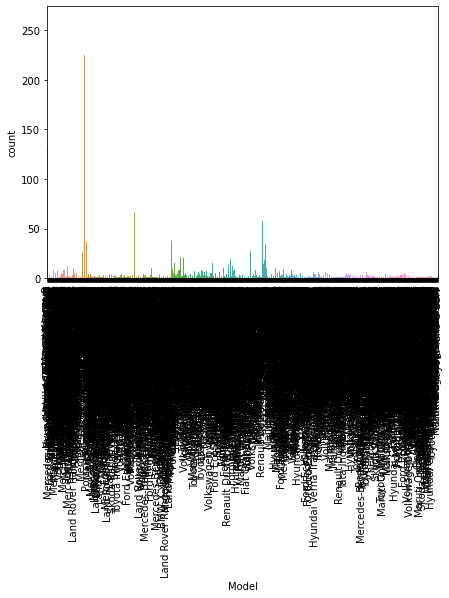



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Fuel


Petrol    3436
Diesel    2718
CNG         53
LPG         17
Name: Fuel, dtype: int64
len= 4


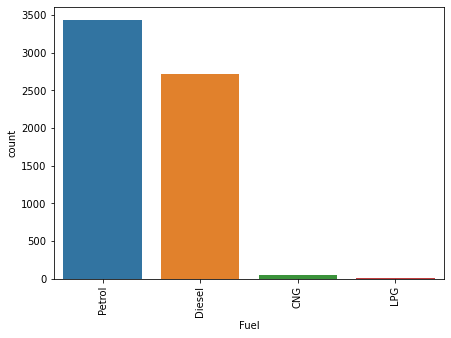



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Transmission


Manual       4956
Automatic    1268
Name: Transmission, dtype: int64
len= 2


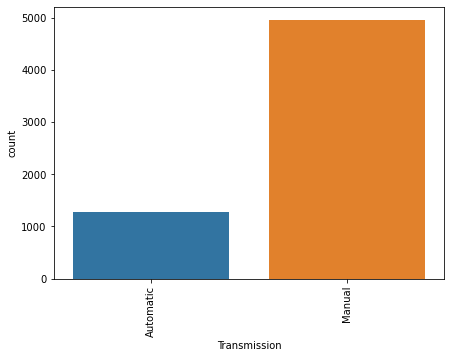



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Location


Bangalore    862
Ahmedabad    829
Pune         770
Mumbai       637
Chennai      636
NCR          587
New Delhi    555
Jaipur       538
Hyderabad    486
Kolkata      177
Gurgaon      117
Noida         30
Name: Location, dtype: int64
len= 12


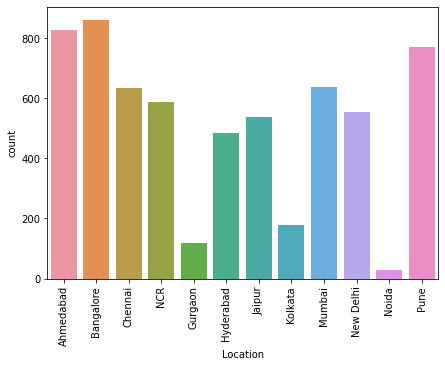



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [147]:
for i in index_c:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.countplot(df[df.columns[i]])
    plt.xticks(rotation=90)
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

column Name: Make_Year


2017    818
2015    809
2016    763
2018    731
2014    618
2013    554
2011    408
2012    401
2019    395
2010    198
2020    165
2009    131
2008     98
2007     58
2006     27
2021     25
2005     11
2004     10
2003      3
2000      1
Name: Make_Year, dtype: int64
len= 20


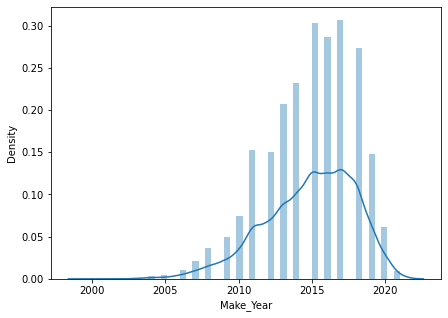



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Driven_Kilometers


65000     69
70000     65
80000     61
60000     59
45000     54
          ..
111751     1
42121      1
48266      1
27788      1
71677      1
Name: Driven_Kilometers, Length: 2760, dtype: int64
len= 2760


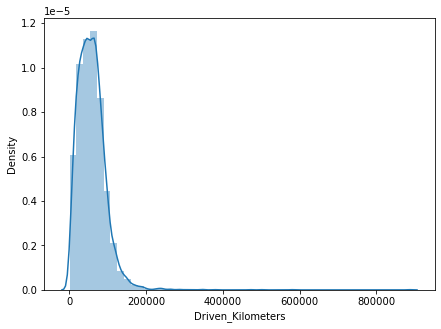



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Owner(s)


1    5026
2    1077
3     104
4      17
Name: Owner(s), dtype: int64
len= 4


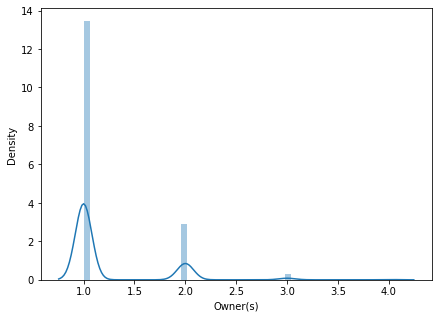



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Mileage


18.90    250
18.60    153
17.00    122
28.40    121
22.00    117
        ... 
21.49      1
13.05      1
17.32      1
16.12      1
21.12      1
Name: Mileage, Length: 389, dtype: int64
len= 389


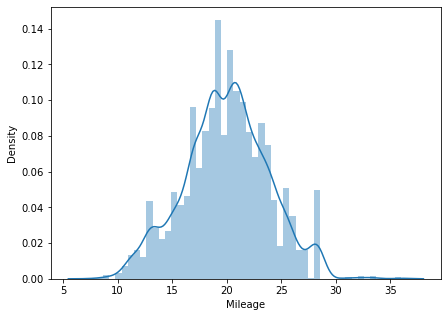



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Engine


1197    1225
1248     722
998      550
1498     393
1198     235
        ... 
2698       1
2487       1
2446       1
4461       1
3192       1
Name: Engine, Length: 115, dtype: int64
len= 115


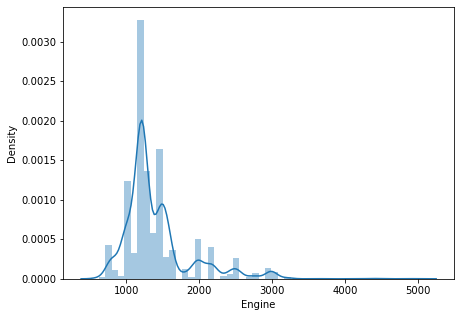



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Price


450000     81
550000     71
325000     62
350000     58
575000     56
           ..
544500      1
458526      1
2740000     1
94000       1
669693      1
Name: Price, Length: 1484, dtype: int64
len= 1484


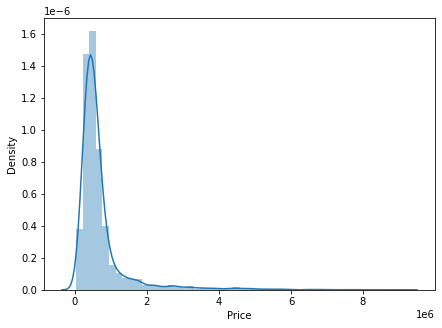



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [148]:
for i in index_n:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.distplot(df[df.columns[i]])
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

From the above distribution plot I can observe most of the columns are not normally distributed only of the columns are almost distributed normally.                                                         
                                 
Almost all the columns have skewness and are skewed to right since the mean is greater than the median in these columns. We need to remove this skewness before building our machine learning models.

In [149]:
df.columns

Index(['Model', 'Make_Year', 'Driven_Kilometers', 'Fuel', 'Transmission',
       'Owner(s)', 'Mileage', 'Engine', 'Price', 'Location'],
      dtype='object')

In [157]:
df

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


# Bivariate Analysis:

<AxesSubplot:title={'center':'2ndFlrSF Vs SalePrice'}, xlabel='Mileage', ylabel='Price'>

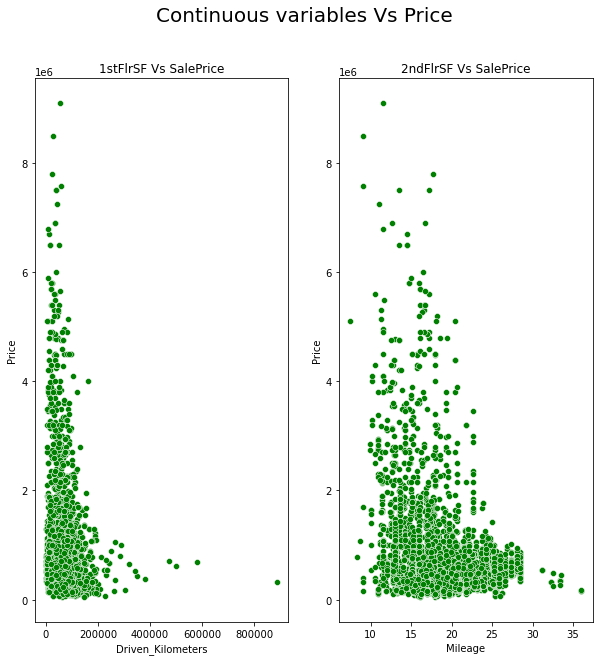

In [156]:
plt.figure(figsize=(10,10))
plt.suptitle('Continuous variables Vs Price',fontsize=20)

plt.subplot(1,2,1)
plt.title('1stFlrSF Vs SalePrice')
sns.scatterplot(x='Driven_Kilometers',y='Price',data=df,color='g')

plt.subplot(1,2,2)
plt.title('2ndFlrSF Vs SalePrice')
sns.scatterplot(x='Mileage',y='Price',data=df,color='g')


we can see if driven kilometer and millage is increase then the price is decrease.

<AxesSubplot:title={'center':'2ndFlrSF Vs SalePrice'}, xlabel='Owner(s)', ylabel='Price'>

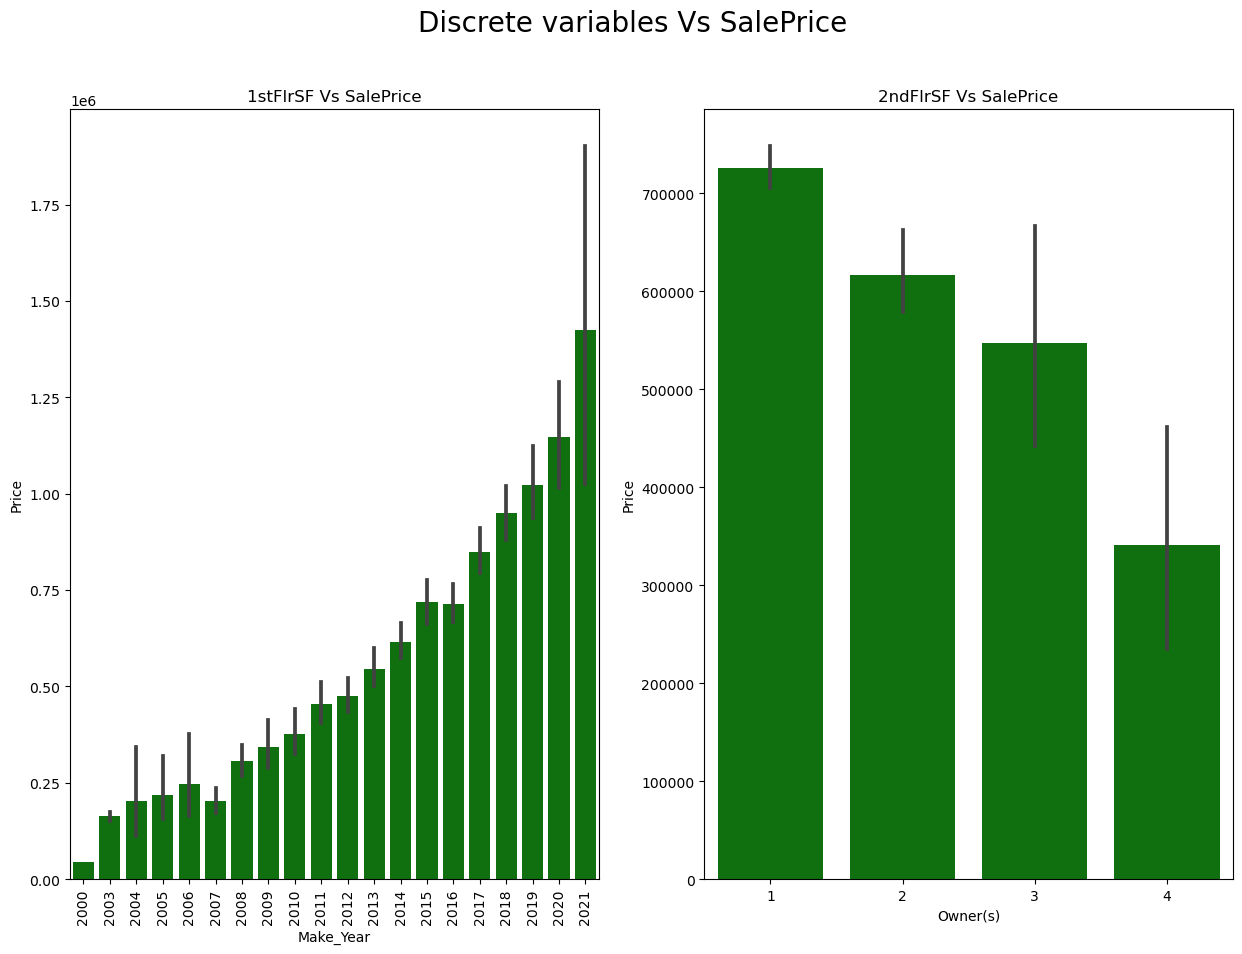

In [163]:
plt.style.use('default')
plt.figure(figsize=(15,10))

plt.suptitle('Discrete variables Vs SalePrice',fontsize=20)
plt.subplot(1,2,1)
plt.title('1stFlrSF Vs SalePrice')
sns.barplot(x='Fuel',y='Price',data=df,color='g')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('2ndFlrSF Vs SalePrice')
sns.barplot(x='Owner(s)',y='Price',data=df,color='g')


In [ ]:
#every year the price of old car inreasing
#if the number of owner increases then the price of the old car decreases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Bangalore'),
  Text(2, 0, 'Chennai'),
  Text(3, 0, 'NCR'),
  Text(4, 0, 'Gurgaon'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'Jaipur'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Mumbai'),
  Text(9, 0, 'New Delhi'),
  Text(10, 0, 'Noida'),
  Text(11, 0, 'Pune')])

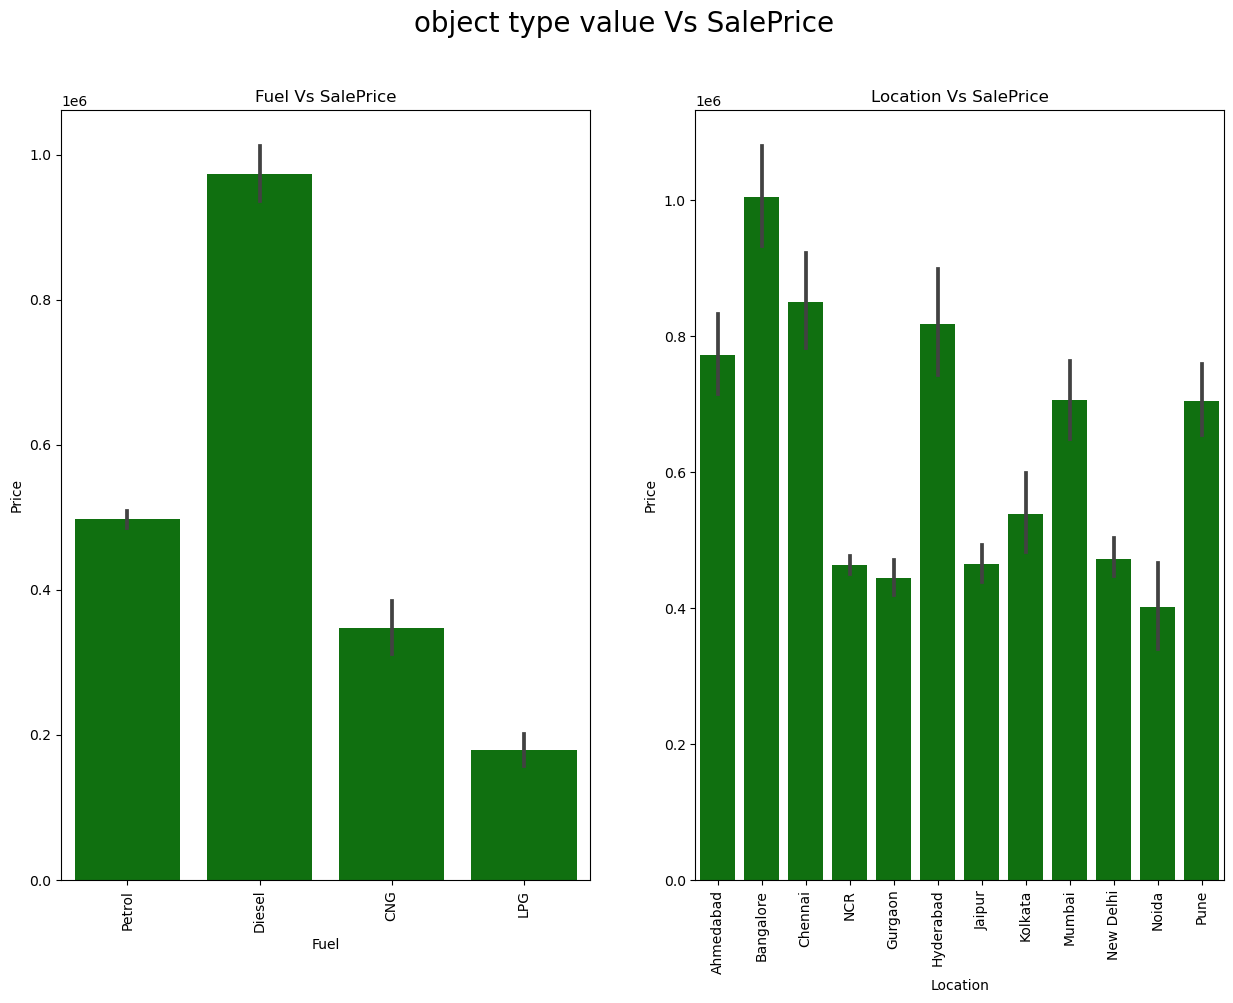

In [166]:
plt.style.use('default')
plt.figure(figsize=(15,10))

plt.suptitle('object type value Vs SalePrice',fontsize=20)
plt.subplot(1,2,1)
plt.title('Fuel Vs SalePrice')
sns.barplot(x='Fuel',y='Price',data=df,color='g')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Location Vs SalePrice')
sns.barplot(x='Location',y='Price',data=df,color='g')
plt.xticks(rotation=90)


In [ ]:
#If the fuel of the car is diesel then price of the car is high and lpg car price is low compare to other type of fuel's car
#In noida price of the old car is low compare to other.
#in bangalore price of the old car is higher then any other location.

# Multivariate Analysis:

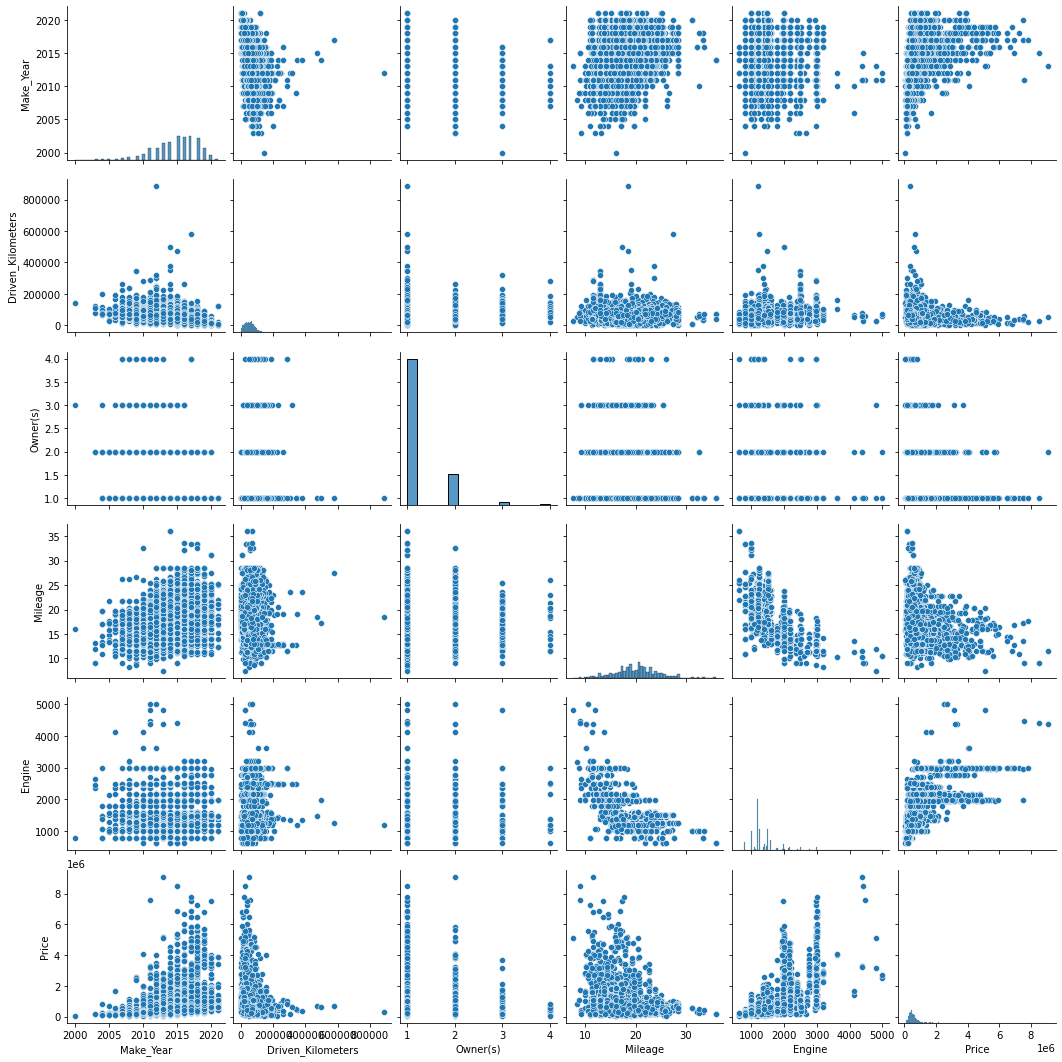

In [31]:
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'RainTomorrow'. Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness , will remove them later.

In [32]:
#Checking Correlation
df.corr()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
Make_Year,1.000000,-0.467516,-0.338092,0.258220,-0.102814,0.278047
Driven_Kilometers,-0.467516,1.000000,0.193648,-0.106689,0.268711,-0.100129
Owner(s),-0.338092,0.193648,1.000000,-0.159762,0.110342,-0.064697
Mileage,0.258220,-0.106689,-0.159762,1.000000,-0.582179,-0.335218
Engine,-0.102814,0.268711,0.110342,-0.582179,1.000000,0.638122
Price,0.278047,-0.100129,-0.064697,-0.335218,0.638122,1.000000


<AxesSubplot:>

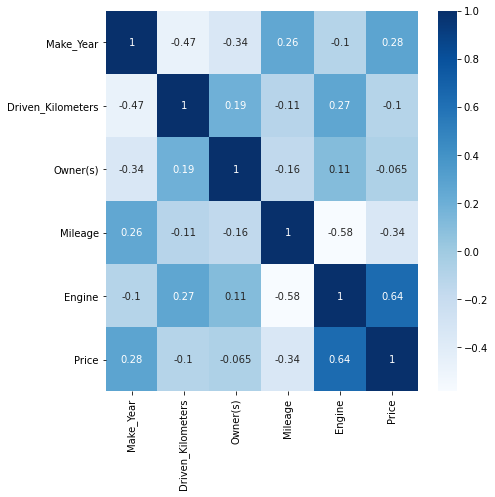

In [35]:
#checking corrleation using heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Features having high Positive correlation with label                                 
Engine                                    
Make_Year                                    
                                                                     

Features having high Negative correlation with label                                   
Driven_Kilometers                              
Owner(s)                           
Mileage                            


In [37]:
#Checking Skewness
df.skew()

Make_Year           -0.611178
Driven_Kilometers    3.696483
Owner(s)             2.253673
Mileage              0.003963
Engine               2.017822
Price                4.320026
dtype: float64

skewness is present in the dataset

# Checking Outliers:

In [51]:
# many continuous features are is categorical in nature, we have to avoid outlier detection on those features

In [52]:
df[numerical_columns].nunique().to_frame('unique values')

,unique values
Make_Year,20
Driven_Kilometers,2760
Owner(s),4
Mileage,389
Engine,115
Price,1484


In [53]:
q=[]
for i in numerical_columns:
    if df[i].nunique()>4:
        q.append(i)

In [54]:
q

['Make_Year', 'Driven_Kilometers', 'Mileage', 'Engine', 'Price']

In [55]:
outliers=[Driven_Kilometers', 'Mileage', 'Engine', 'Price']

SyntaxError: invalid syntax (<ipython-input-55-e385b6434662>, line 1)

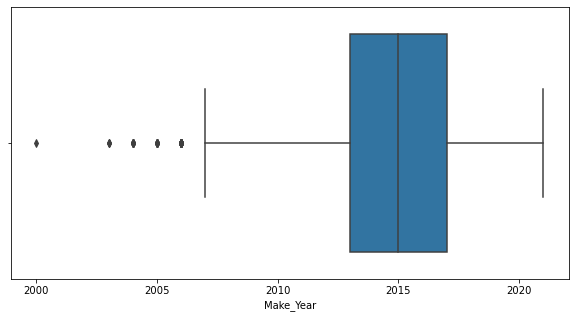



###############################################################################################################################


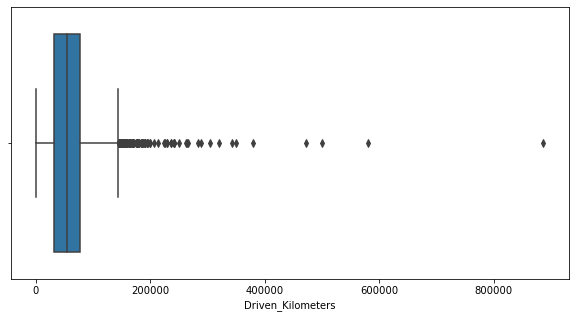



###############################################################################################################################


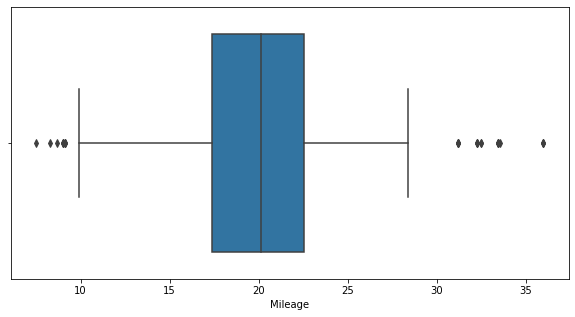



###############################################################################################################################


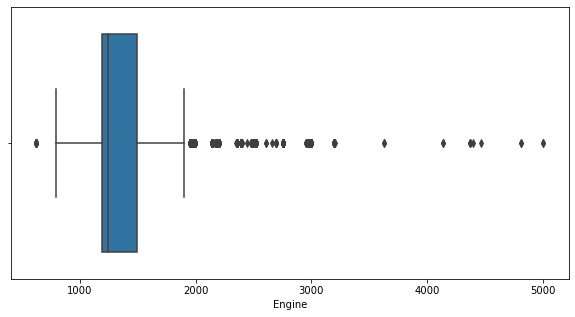



###############################################################################################################################


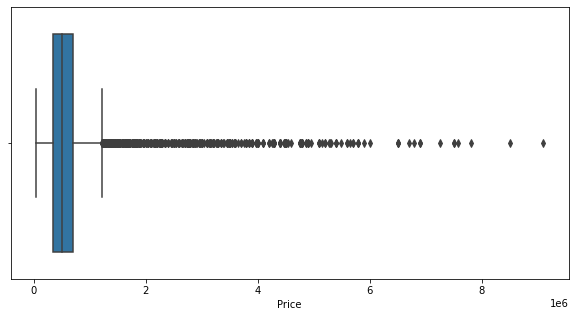



###############################################################################################################################


In [56]:
#Box plot of all Numerical Column
for i in outliers:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*127)

All the columns contains outlier.

# Outliers handle by zscore:

In [57]:
#import zscore
from scipy.stats import zscore

In [58]:
z=np.abs(zscore(df[outliers]))
z

array([[0.69922856, 0.45274155, 0.14258053, 0.87213865, 0.35738467],
       [0.69922856, 0.31187658, 0.52740409, 0.37765724, 0.2513373 ],
       [1.0263973 , 1.15584752, 0.44111159, 1.20372096, 3.26877338],
       ...,
       [1.0263973 , 0.91775648, 0.73812306, 0.19361195, 0.38879225],
       [0.93661513, 0.28535128, 0.65289368, 0.02039419, 0.31156679],
       [1.26378387, 0.2323007 , 0.45402513, 0.87213865, 0.62574655]])

In [59]:
df_new=df[(z<3).all(axis=1)]
df_new

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
5,Honda City V CVT,2019,28707,Petrol,Automatic,1,18.40,1498,1050000,Ahmedabad
6,Kia Seltos HTX Plus AT D,2019,34000,Diesel,Automatic,1,17.80,1493,1350000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [60]:
print(df.shape)
print(df_new.shape)

(6224, 10)
(5893, 10)


In [49]:
percentage_of_dataloss=((6224-5893)/6224)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 5.3181233933161955


# LabelEncoding:

In [61]:
# checking for categorical columns
categorical_columns=[]
for i in df_new.dtypes.index:
    if df_new.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Model', 'Fuel', 'Transmission', 'Location']


In [62]:
list_c=['Model', 'Fuel', 'Transmission', 'Location','Make_Year']

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_c:
    df_new[i]=le.fit_transform(df_new[i]).astype(int)

In [64]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5893 entries, 0 to 6223
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              5893 non-null   int32  
 1   Make_Year          5893 non-null   int32  
 2   Driven_Kilometers  5893 non-null   int64  
 3   Fuel               5893 non-null   int32  
 4   Transmission       5893 non-null   int32  
 5   Owner(s)           5893 non-null   int64  
 6   Mileage            5893 non-null   float64
 7   Engine             5893 non-null   int64  
 8   Price              5893 non-null   int64  
 9   Location           5893 non-null   int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 391.3 KB


now all the columns are numerical type and no null values are in the dataframe

# Dividing data in features and vectors:

In [65]:
df_new

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,53,11,41174,3,0,1,20.51,998,430000,0
1,455,11,70000,1,0,1,22.00,1582,894999,0
3,302,10,55000,3,0,1,18.00,1497,877999,0
5,288,13,28707,3,0,1,18.40,1498,1050000,0
6,559,13,34000,1,0,1,17.80,1493,1350000,0
...,...,...,...,...,...,...,...,...,...,...
6219,175,13,30000,1,1,1,23.00,1498,990000,11
6220,877,11,40000,3,1,1,20.51,998,450000,11
6221,1162,12,23643,3,1,1,17.10,1496,1000000,11
6222,450,6,69000,3,1,1,17.43,1396,465000,11


In [68]:
x=df_new.drop("Price",axis=1) #Independent variable
y=df_new.iloc[:,-2] #Dependent variable

In [69]:
x

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Location
0,53,11,41174,3,0,1,20.51,998,0
1,455,11,70000,1,0,1,22.00,1582,0
3,302,10,55000,3,0,1,18.00,1497,0
5,288,13,28707,3,0,1,18.40,1498,0
6,559,13,34000,1,0,1,17.80,1493,0
...,...,...,...,...,...,...,...,...,...
6219,175,13,30000,1,1,1,23.00,1498,11
6220,877,11,40000,3,1,1,20.51,998,11
6221,1162,12,23643,3,1,1,17.10,1496,11
6222,450,6,69000,3,1,1,17.43,1396,11


In [70]:
y

0        430000
1        894999
3        877999
5       1050000
6       1350000
         ...   
6219     990000
6220     450000
6221    1000000
6222     465000
6223     225000
Name: Price, Length: 5893, dtype: int64

# Checking VIF score:

In [71]:
# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Make_Year', 'Driven_Kilometers', 'Owner(s)', 'Mileage', 'Engine', 'Price']


In [73]:
p=x[['Make_Year', 'Driven_Kilometers', 'Owner(s)', 'Mileage', 'Engine',]]

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [75]:
#checking VIF score
vif_clac()

   VIF Factor           features
0   15.982690          Make_Year
1    7.155601  Driven_Kilometers
2    7.738798           Owner(s)
3   21.545291            Mileage
4   14.583670             Engine


In [274]:
#we see VIF score is not under but we have only 5 numerical columns.so we can not drop any column

# Transforming data to remove skewness:

In [76]:
#checking skewness
x.skew()

Model                0.687248
Make_Year           -0.509771
Driven_Kilometers    0.572765
Fuel                -0.340996
Transmission        -1.709989
Owner(s)             2.250628
Mileage             -0.003160
Engine               1.467254
Location             0.122735
dtype: float64

we can see some columns have heavy skewness

In [77]:
#we use power transformation(method= yeo-johnson) method to remove skewness of the columns

In [78]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.79408251,  0.69660149, -0.37958088, ...,  0.08217744,
        -1.14354366, -1.58123407],
       [ 0.60844122,  0.69660149,  0.523039  , ...,  0.49106797,
         0.83273976, -1.58123407],
       [ 0.30239796,  0.31859025,  0.07861797, ..., -0.60717812,
         0.62638402, -1.58123407],
       ...,
       [ 1.38753561,  1.08944559, -1.07039388, ..., -0.8545408 ,
         0.62384066,  1.40199084],
       [ 0.59992765, -1.02905756,  0.49475888, ..., -0.7638293 ,
         0.35433118,  1.40199084],
       [ 1.14738117, -1.31952052,  0.43767089, ..., -0.55222231,
        -1.14354366,  1.40199084]])

In [80]:
#print skewness after power transform
df_new1=pd.DataFrame(x,columns=df_new.drop("Price",axis=1).columns)
df_new1.skew()

Model               -0.115711
Make_Year           -0.159996
Driven_Kilometers   -0.068126
Fuel                -0.327753
Transmission        -1.709989
Owner(s)             1.588845
Mileage             -0.007392
Engine              -0.035160
Location            -0.205784
dtype: float64

In [81]:
#ploting distribution curve of all columns

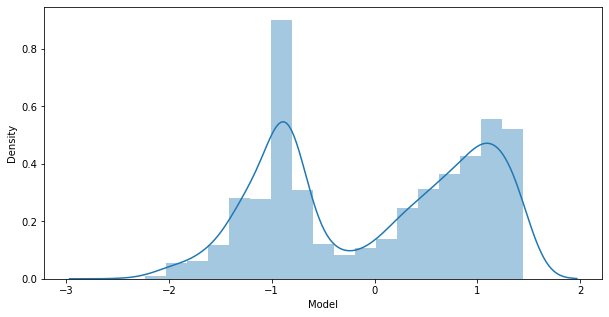

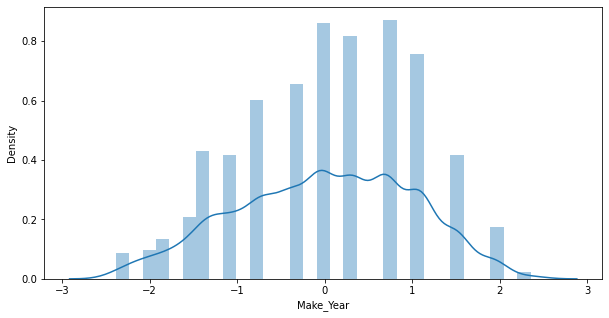

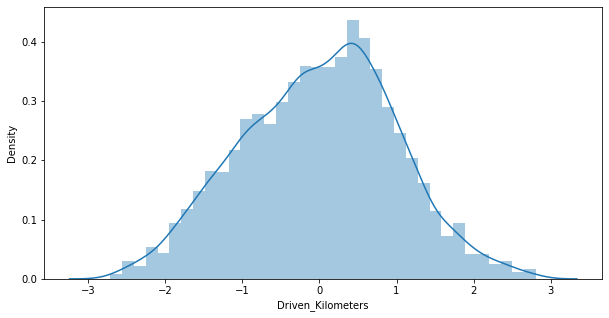

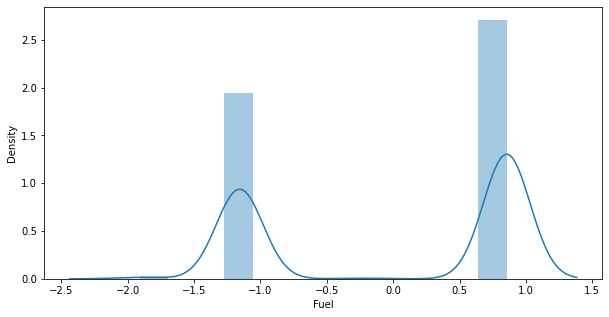

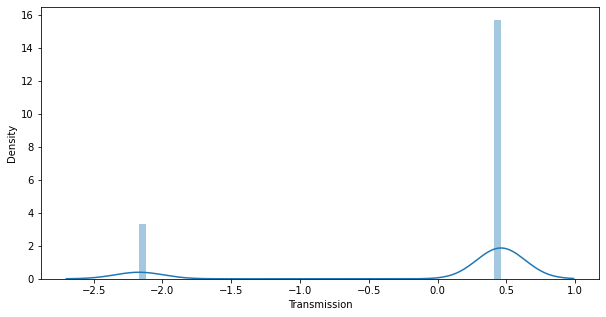

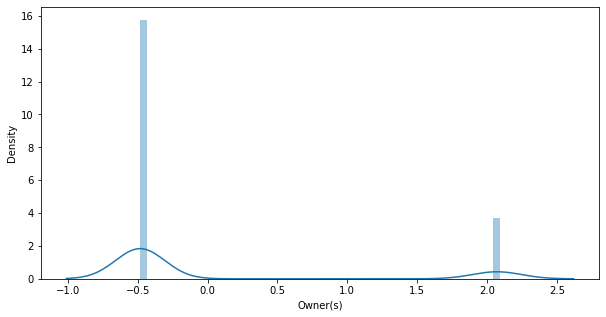

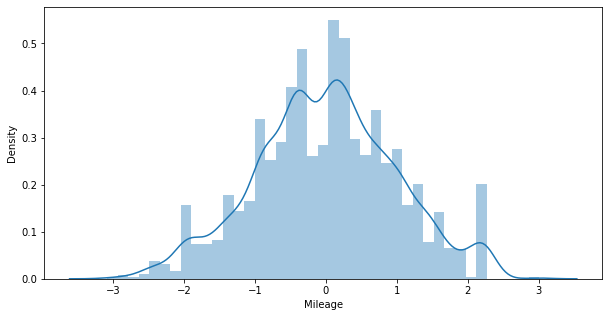

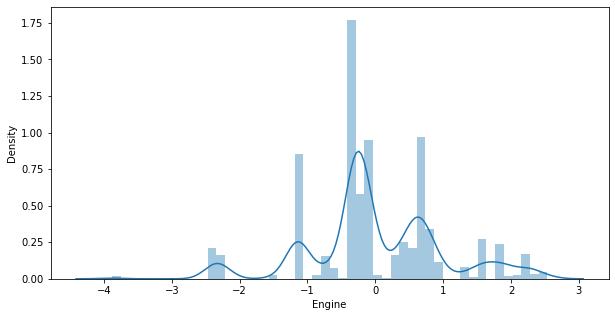

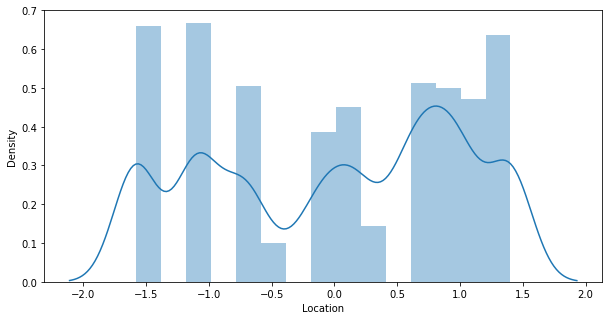

In [83]:
for i in range(9):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

skewness has been removed from all numerical columns.

In [84]:
#standardizing the data

In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.79408251,  0.69660149, -0.37958088, ...,  0.08217744,
        -1.14354366, -1.58123407],
       [ 0.60844122,  0.69660149,  0.523039  , ...,  0.49106797,
         0.83273976, -1.58123407],
       [ 0.30239796,  0.31859025,  0.07861797, ..., -0.60717812,
         0.62638402, -1.58123407],
       ...,
       [ 1.38753561,  1.08944559, -1.07039388, ..., -0.8545408 ,
         0.62384066,  1.40199084],
       [ 0.59992765, -1.02905756,  0.49475888, ..., -0.7638293 ,
         0.35433118,  1.40199084],
       [ 1.14738117, -1.31952052,  0.43767089, ..., -0.55222231,
        -1.14354366,  1.40199084]])

Now our Data is Ready for Model Building

# Model Building:

In [86]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
x.shape

(5893, 9)

In [88]:
lm=LinearRegression()
m=0
for i in range (0,5000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 0.6452931539854956 at random state= 2464


we find the best random state state at 2464.we will creat our train_test_split using this random state

In [89]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=2464)

In [90]:
#cheking shape of all variable
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (4125, 9)
test_x shape = (1768, 9)
train_y shape = (4125,)
test_y shape = (1768,)


In [91]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

0.6452931539854956

In [92]:
lm.coef_

array([  18064.73316739,  172521.51928998,  -29595.88957843,
        -93816.38945136, -109354.0167243 ,   -9960.91002387,
        -89215.76224912,  130018.99911537,  -24272.38526954])

In [93]:
lm.intercept_

590585.5096350091

# Error of Llinear regression Model on our dataset

In [94]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  167520.54803131684
Mean Squared Error:  67168955839.84704
Root Mean Squared Error:  259169.74329548393


In [95]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

0.5878984525714855


In [96]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 0.465962250459353


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [99]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]

In [100]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 0.6452931539854956


##################################################
accuracy score of Ridge() is = 0.6452931277823244


##################################################
accuracy score of Lasso() is = 0.6452931539375557


##################################################
accuracy score of DecisionTreeRegressor() is = 0.9999916527197423


##################################################
accuracy score of SVR() is = -0.06459263507374624


##################################################
accuracy score of KNeighborsRegressor() is = 0.8702798291992135


##################################################
accuracy score of RandomForestRegressor() is = 0.9852526380106977


##################################################
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,


In [ ]:
# we get best accuracy score from DecisionTreeRegressor

# Checking Cross Val Score:

In [101]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LinearRegression() is = 0.3253561586330857
cross validation score of Ridge() is = 0.2961451180386619
cross validation score of Lasso() is = 0.29595868028954236
cross validation score of DecisionTreeRegressor() is = 0.4511494783117148
cross validation score of SVR() is = -0.18016189771129965
cross validation score of KNeighborsRegressor() is = 0.4238752292223086
cross validation score of RandomForestRegressor() is = 0.6200640116550336
cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
    

we get best cross val score from RandomForestRegressor for CV=8

# Parameter Tuning:RandomForestRegressor

In [116]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=8,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'max_depth': 3, 'max_features': 'auto'}

In [117]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=3)

In [118]:
gcv1.best_estimator_.fit(test_x,test_y)
print("Test Accuracy=",gcv1.best_estimator_.score(test_x,test_y))

Test Accuracy= 0.7163954631876809


accuracy score is not increased after parameter tuning.

# Parameter Tuning:GradientBoostingRegressor

In [119]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7,8],'learning_rate':[1,0.1,0.001,0.0001]}
gcv1=GridSearchCV(GradientBoostingRegressor(),parameters,cv=3,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'learning_rate': 1, 'max_depth': 3, 'max_features': 'auto'}

In [120]:
gcv1.best_estimator_

GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [121]:
gcv1.best_estimator_.fit(test_x,test_y)
print("Test Accuracy=",gcv1.best_estimator_.score(test_x,test_y))

Test Accuracy= 0.9869274604337335


accuracy score is increased after parameter tuning.so we creat final model with this parametr

# Creating Final Model:

In [122]:
final_model=GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [123]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 0.9869274604337335


In [124]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 0.9737133901362378


since difference between train accuracy and test accuracy is very less ,our model is not overfit or underfit.

In [125]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  81324.74650678824
Mean Squared Error:  25445525192.516438
Root Mean Squared Error:  159516.53579650118


,Predicted,Original
1682,525000.000000,525000
3155,597846.471454,612000
5925,445791.573738,450000
679,726520.567561,748000
1568,990280.879096,900000
...,...,...
1541,363382.156270,350000
6099,164506.204033,150000
2859,246407.135661,200000
1158,675831.310439,655000


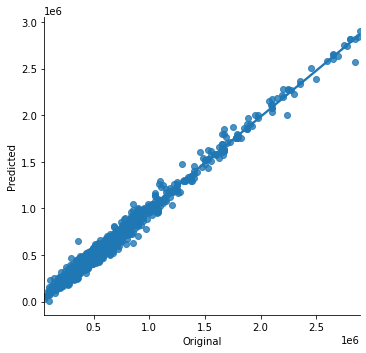

In [126]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

In [127]:
#Save the final model                                                                      
import joblib 
#joblib.dump(final_model,'Old Car price prediction Model.pkl')

# --------------------------------------------THANK YOU-------------------------------------------------